In [1]:
import numpy as np
from librosa.core import cqt
import matplotlib.pyplot as plt
import time
import torch
import torch.nn as nn
from librosa.core import note_to_hz
import pandas as pd
from scipy import fftpack

import sys
sys.path.insert(0,'../')

import Spectrogram

import os
os.environ['CUDA_VISIBLE_DEVICES']='3'

if torch.cuda.is_available():
    device = "cuda:0"
    torch.set_default_tensor_type('torch.cuda.FloatTensor')

In [2]:
fs = 512
# y_list = np.load('../y_list.npy')
s = np.linspace(0,10,fs*1)
y_list = np.sin(2*np.pi*1*s, dtype=np.float32) + np.sin(2*np.pi*2*s, dtype=np.float32) \
    + np.sin(2*np.pi*4*s, dtype=np.float32) + np.sin(2*np.pi*8*s, dtype=np.float32)  
y_torch = torch.tensor(y_list, dtype=torch.float)

y_torch = torch.tensor(y_list, dtype=torch.float)

n_bins=24*7

mel_layer = Spectrogram.STFT_complex(n_fft=512, center=False, window='ones')
spec = mel_layer(y_torch)

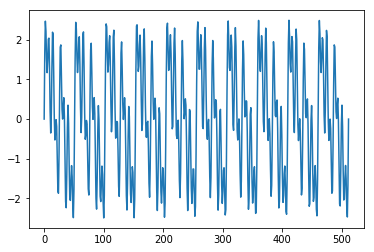

In [3]:
plt.plot(y_list)

In [4]:
real = spec[0]
imag = spec[1]

In [5]:
ffted = fftpack.fft(y_list)

In [6]:
np.allclose(ffted.real, real[0].cpu().numpy().reshape(-1),1)

True

In [7]:
inverse_layer = Spectrogram.iSTFT_complex(n_fft=512, center=False, window='ones')

In [8]:
a, b = inverse_layer(real.view(-1,512), imag.view(-1,512))

In [9]:
iy = torch.sqrt(a.pow(2)+b.pow(2))

In [10]:
y_f = np.array(real.view(-1,512).cpu().numpy()+imag.view(-1,512).cpu().numpy()*1j)

In [11]:
iy_np = np.fft.fft(np.conj(ffted))/512

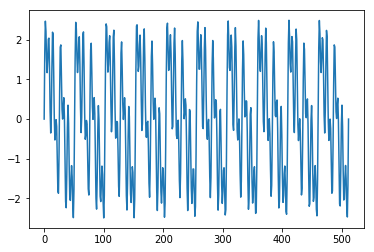

In [12]:
plt.plot(iy_np.real)

# Step by step

In [13]:
iy_np_a = fftpack.fft(ffted.real)/512
iy_np_b = fftpack.fft(ffted.imag)/512

In [14]:
output = np.conj(iy_np_a) + np.conj(iy_np_b)*1j

In [15]:
output.dtype

dtype('complex64')

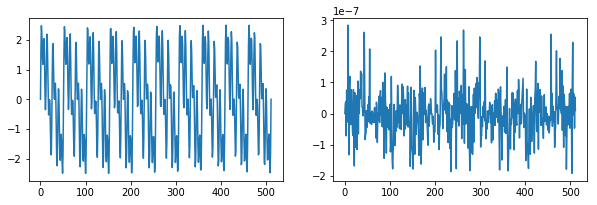

In [16]:
fig, ax = plt.subplots(1,2, figsize=(10,3))
ax[0].plot(output.real)
ax[1].plot(output.imag)

In [17]:
a1 = iy_np_a.real 
a2 = -iy_np_a.imag
b1 = iy_np_b.real #j
b2 = -iy_np_b.imag #j

In [18]:
#ifft = e^(+2\pi*j)*X

#ifft(X_real) = (x1_real, x1_imag)

#ifft(X_imag)*1j = (x2_real, x2_imag)*1j
#                = (-x2_imag, x2_real)

In [19]:
output2 = a1-b2

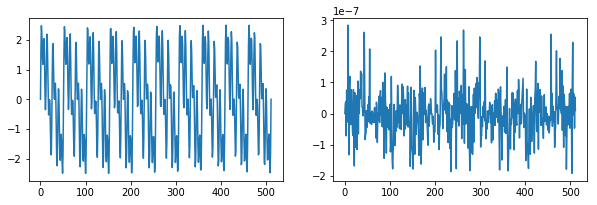

In [20]:
fig, ax = plt.subplots(1,2, figsize=(10,3))
ax[0].plot(output2)
ax[1].plot(a2+b1)

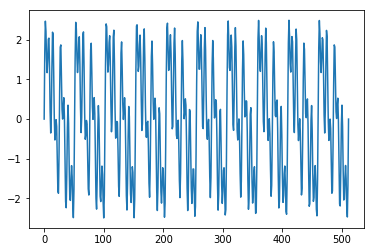

In [21]:
plt.plot(a[0].cpu().numpy())

In [22]:
np.allclose(iy_np.real, a[0].view(-1).cpu().numpy(),1)

False

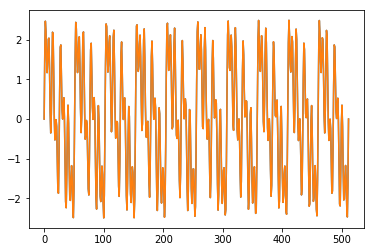

In [31]:
plt.plot(a[0].cpu().numpy())
plt.plot(a1-b2)